In [1]:
# if jupyterlab:
%matplotlib widget
# if jupyter notebook:
# %matplotlib notebook

import numpy as np 
from recoMRD import recoMRD_B0
from recoMRD import utils
import os

filename = './../example_data/meas_MID00575_FID29449_aa_B0Phantom.mrd'
mrd = recoMRD_B0(filename)
print(mrd.img.shape)
print(mrd.img_b0.shape)
print(mrd.img_mag.shape)
print(mrd.img_mask.shape)

Number of reference scans: 0
Number of image     scans: 17600
k-space size in protocol: 220 x 110 x 80
image   size in protocol: 110 x 110 x 80
Existing scans: image_scan.
Fully sampled array size=[32, 220, 110, 80, 1, 2, 1, 1, 1, 1, 1]
RO zero pad index = 2


Filling image_scan, size=[32, 216, 110, 80, 1, 2, 1, 1, 1, 1, 1]: 100%|██████████| 17600/17600 [00:02<00:00, 8235.95it/s]


[[ 1.  1.  1.  0.]
 [ 1.  1.  0.  1.]
 [ 1. 80.  0.  0.]
 [ 1.  1.  0.  0.]]
Remove oversampling... Done.


Fourier transform: 100%|██████████| 32/32 [00:02<00:00, 11.30it/s]


Calculating B0 map. ΔTE = 3.5 ms
(32, 110, 110, 80, 1, 2, 1, 1, 1, 1, 1)
(1, 110, 110, 80, 1, 1, 1, 1, 1, 1, 1)
(1, 110, 110, 80, 1, 1, 1, 1, 1, 1, 1)
(1, 110, 110, 80, 1, 1, 1, 1, 1, 1, 1)


In [2]:
b0_uw = mrd.unwrap_b0()
b0_hz = mrd.get_b0hz(b0_uw, 0)

print(mrd.dim_size)
print(b0_uw.shape)

folder = './../example_data'
mrd.make_nifti(mrd.img_b0, os.path.join(folder, 'b0.nii'))
mrd.make_nifti(b0_uw, os.path.join(folder, 'b0_uw.nii'))
mrd.make_nifti(b0_hz, os.path.join(folder, 'b0_hz.nii'))

Unwrapping B0...
[32, 220, 110, 80, 1, 2, 1, 1, 1, 1, 1]
(1, 110, 110, 80, 1, 1, 1, 1, 1, 1, 1)


/kyb/agks/aaghaeifar/.local/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


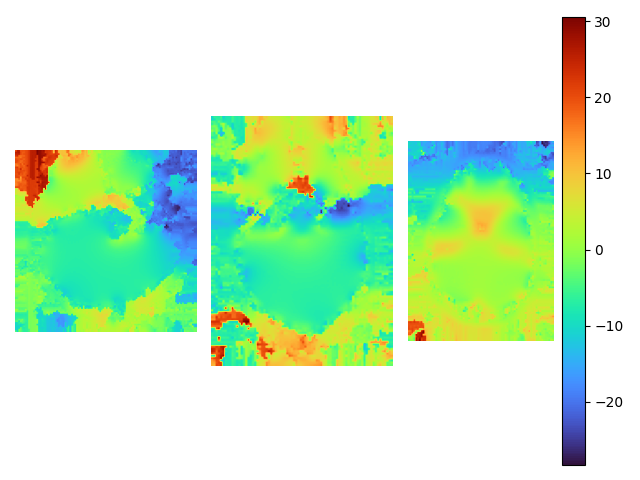

In [3]:
utils.plot3D(b0_uw)